# Monte Carlo Endowment Simulation Model
### Variables
|Input|Variable|Monte Carlo|
|--------|-------|
|Seed Endoment (M$) – 10|seed_endowment_M \* 1000000| |
|Starting Cash Balance (K$) – 500|starting_cash_K \* 1000| |
|Avg. Monthly User Gain (K) – 10|user_gain_mo_K \* 1000|?|
|Permanent Storage Fee Charged ($) – 10|fee_storage_gb||
|Avg. Permanent Storage Per User (GB) – 100|gb_user|?|
|Monthly Payroll Expenses (K$) – 120|cost_staff_mo_K\*1000||
|Monthly Hosting Expense per User ($) – 0.1|cost_hosting_mo_user \* *total_users*||
|Total Monthly Storage Cost per GB Uploaded ($) – 0.06|-((1-(rate_storage_decline_yr/12))^(month-1)) \* cost_storage_mo_gb \* gb_user \* *total_users*|?|
|User Aquisition Cost ($) – 1|cost_aquisition_user \* *user_gain*|?|
|Yearly Endowment Return (%) – 0.05|rate_endowment_return_yr / 12|y|
|Yearly Decline in Storage Cost (Kryder Rate) – 0.15|rate_storage_decline_yr / 12|?|

### Formulas
##### This Month's Endowment = Last Month's Endowment + (fee per GB of storage per mo. \* GB per user per mo. \* user gain per mo.) + net

#### E1 = E0\*\*r + (storage_fee \* user_storage \* user_gain) + net
- E0 = this month's endowment
- E1 = last month's endowment
- storage_fee = fee_storage_gb (fee per GB of storage per mo.) 
- user_storage = gb_user (GB per user per mo.)
- user_gain = user_gain_mo_K\*1000 (user gain per mo.)
- net = income - storage_cost - operating_cost
    - income = endowment return
    - unrestricted donations = 0

#### endowment_return = this month's endowment \* (rate_endowment_return_yr/12)\*\*r 
- r = periodic rate of return; monte carlo simulator generates theoretical future r values


In [80]:
# Code from monte_carlo.py
from numpy.random import normal
import numpy as np
import math
import matplotlib.pyplot as plt

def monte_carlo_step(previous, rate, stdv):
    return previous * math.exp(normal(rate, stdv))

def build_monte_carlo_array(previous, rate, stdv, depth):
    sim_series = [monte_carlo_step(previous, rate, stdv)]
    for i in range(depth):
        sim_series.append(monte_carlo_step(sim_series[i], rate, stdv))
    return np.array([sim_series])

In [81]:
constants = {
    'seed_endowment_M': 5,
    'starting_cash_K': 0,
    'user_gain_mo_K': 10,
    'fee_storage_gb': 10,
    'gb_user': 100,
    'cost_staff_mo_K': 120,
    'cost_hosting_mo_user': 0.1,
    'cost_hosting_mo_gb': 0.06,
    'cost_aquisition_user': 1,
    'rate_endowment_return_yr': 0.05,
    'rate_storage_decline_yr': 0.15  # kryder rate
}
print(*constants)

def c(seed_endowment_M, starting_cash_K, user_gain_mo_K, fee_storage_gb, gb_user, cost_staff_mo_K, cost_hosting_mo_user, cost_hosting_mo_gb, cost_aquisition_user, rate_endowment_return_yr, rate_storage_decline_yr):
    print(seed_endowment_M, starting_cash_K, user_gain_mo_K, fee_storage_gb, gb_user, cost_staff_mo_K, cost_hosting_mo_user, cost_hosting_mo_gb, cost_aquisition_user, rate_endowment_return_yr, rate_storage_decline_yr)
c(**constants)

seed_endowment_M starting_cash_K user_gain_mo_K fee_storage_gb gb_user cost_staff_mo_K cost_hosting_mo_user cost_hosting_mo_gb cost_aquisition_user rate_endowment_return_yr rate_storage_decline_yr
5 0 10 10 100 120 0.1 0.06 1 0.05 0.15


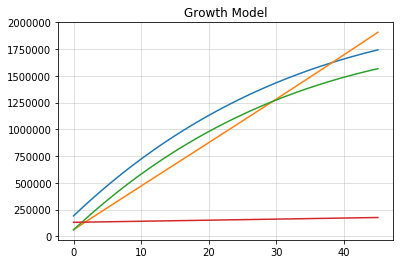

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Replicating P&L
# class inputs:
seed_endowment_M = 5
starting_cash_K = 0
user_gain_mo_K = 10
fee_storage_gb = 10
gb_user = 100
cost_staff_mo_K = 120
cost_hosting_mo_user = 0.1
cost_storage_mo_gb = 0.06
cost_aquisition_user = 1
rate_endowment_return_yr = 0.05 # --> monte
rate_storage_decline_yr = 0.15  # kryder rate

# ----------------------------------------------------------
# Static
staff = cost_staff_mo_K*1000
user_aquisition = cost_aquisition_user * (user_gain_mo_K*1000)
user_gain = user_gain_mo_K*1000
donations = 0

# Init values
# months = range(1,months)
total_users = 0
endowment = seed_endowment_M*1000000
cash_balance = starting_cash_K*1000

endowment_return = endowment * (rate_endowment_return_yr/12)
income = endowment_return + donations

app_hosting = cost_hosting_mo_user * total_users
operating_cost = staff + app_hosting + user_aquisition
storage_cost = ((1-(rate_storage_decline_yr/12))**(0-1)) \
                    * cost_storage_mo_gb * gb_user * total_users
total_expense = operating_cost + storage_cost
net = income - total_expense

# results = {}
months = range(1,47)

results = {
    'month': [],
    'total_expense': [],
    'endowment_return': [],
    'storage_expense':[],
    'operating_expense':[]
}

for i in months:
    total_users += user_gain
    endowment += (fee_storage_gb * gb_user * user_gain) + net

    endowment_return = endowment * (rate_endowment_return_yr/12)
    income = endowment_return + donations

    app_hosting = cost_hosting_mo_user * total_users
    operating_cost = staff + app_hosting + user_aquisition
    storage_cost = ((1-(rate_storage_decline_yr/12))**(i-1)) \
                        * cost_storage_mo_gb * gb_user * total_users
    total_expense = operating_cost + storage_cost
    net = income - total_expense

    results['month'].append(i)
    results['total_expense'].append(total_expense)
    results['endowment_return'].append(endowment_return)
    results['storage_expense'].append(storage_cost)
    results['operating_expense'].append(operating_cost)

# print(results)

ax.plot(results['total_expense'])
ax.plot(results['endowment_return'])
ax.plot(results['storage_expense'])
ax.plot(results['operating_expense'])

plt.grid(True, alpha=0.5)
plt.title('Growth Model')
plt.show()

In [68]:
staff = cost_staff_mo_K*1000
user_acquisition = cost_aquisition_user*user_gain_mo_K*1000
donations = 0
results = {}

def getValues(month, seed_endowment_M, starting_cash_K, user_gain_mo_K, fee_storage_gb, gb_user, cost_staff_mo_K, cost_hosting_mo_user, cost_hosting_mo_gb, cost_aquisition_user, rate_endowment_return_yr, rate_storage_decline_yr):
    if month==1:
        endowment = seed_endowment_M*1000000
        cash_balance = starting_cash_K*1000
        total_users = 0
        
        endowment_return = endowment * (rate_endowment_return_yr/12)
        income = endowment_return + donations
        
        app_hosting = cost_hosting_mo_user * total_users
        operating_cost = sum(staff, app_hosting, user_aquisition)
        storage_cost = ((1-(rate_storage_decline_yr/12))**(i-1)) \
                            * cost_storage_mo_gb * gb_user * total_users
        total_expense = operating_cost + storage_cost
        net = income - total_expense
        
        results[str(i)] = {
            'month': i,
            'endowment_return': endowment_return,
            'total_expense': total_expense
        }
    else:
        return getValues(month-1, seed_endowment_M, starting_cash_K, user_gain_mo_K, fee_storage_gb, gb_user, cost_staff_mo_K, cost_hosting_mo_user, cost_hosting_mo_gb, cost_aquisition_user, rate_endowment_return_yr, rate_storage_decline_yr)
        
# def model(nMonths, seed_endowment_M, starting_cash_K, user_gain_mo_K, fee_storage_gb, gb_user, cost_staff_mo_K, cost_hosting_mo_user, cost_hosting_mo_gb, cost_aquisition_user, rate_endowment_return_yr, rate_storage_decline_yr):
#     endowment = seed_endowment_M*1000000
#     cash_balance = starting_cash_K*1000
#     total_users = 0
#     getValues()

getValues(3,)

NameError: name 'cost_staff_mo_K' is not defined